# 1.Imports libraries

In [87]:
#Basic python libraries for data processing
import pandas as pd
import numpy as np
import string

#Visulisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Regular expression tools
import re

#NLP libraries
from wordcloud import WordCloud
import nltk   #Natural Language Toolkit
from nltk.corpus import stopwords
import spacy
from spacy import displacy

#Some set up
nltk.download('stopwords')
# Get English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Load Dataset

In [88]:
df = pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")


# 3. Exploratory Data Analysis (EDA)

In [89]:
#Checking the first 10 data from dataset
df.head(10)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [90]:
## Distribution of Resume Categories e.g. it has 84 
#resume have the category of Java Developer

df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

## 3.1 Category Distribution

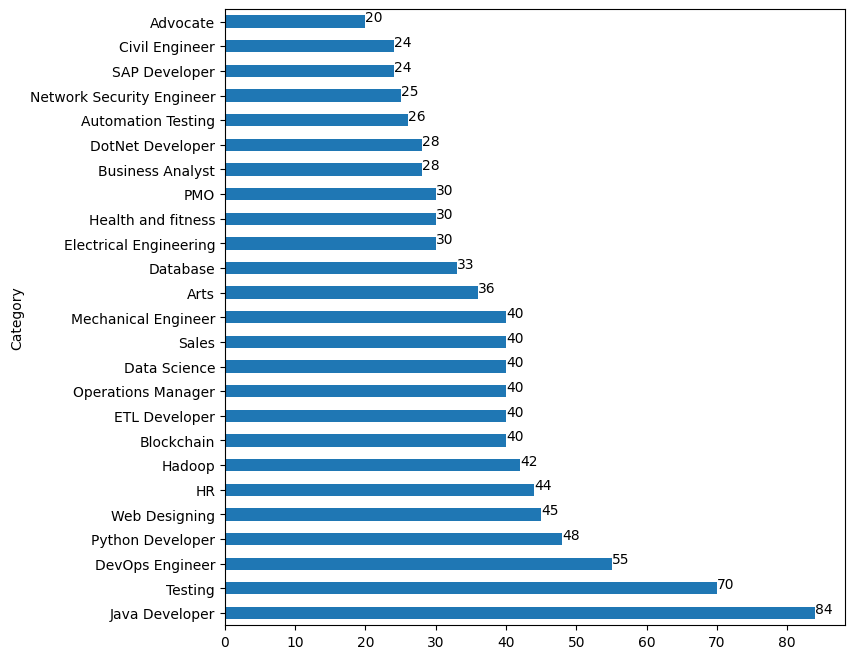

In [91]:
# Plotting category distribution
plt.figure(figsize=(8,8))

df.Category.value_counts().plot(kind='barh')

for index, value in enumerate(df.Category.value_counts().values):
    plt.text(value, index, str(value))
    
plt.show();

Java Developer is the most represented category in the dataset, while Advocate is among the least represented

In [92]:
# Sample Resume Visualization
print("Original Sample Resume: \n")
df['Resume'][1]

Original Sample Resume: 



'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

## 3.2 Text Cleaning Functions:

In [93]:
#Helper function for cleaning text in the resume
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove carriage returns and line feeds
    text = text.replace('\r', '').replace('\n', ' ')
    # Remove non-ASCII characters
    text = text.encode('ascii', errors='ignore').decode('utf-8')
    # Collapse multiple spaces into one
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    
    return text


In [94]:
#this clean the skill tokens
def clean_skills_text(text):
    if not isinstance(text, str):
        return ""
    
    # Lowercase and tokenize
    tokens = text.lower().split()
    # Remove stopwords and non-alpha words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)


## 3.3 Applying helper function to the Resume

In [95]:
# Apply cleaning function to 'Resume' column
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)


In [96]:
#To show the sample resume after cleaning 
print("Clean Version of Sample Resume")
df['Cleaned_Resume'][1]

Clean Version of Sample Resume


'education details may 2013 to may 2017 b.e uit-rgpv data scientist data scientist - matelabs skill details python- exprience - less than 1 year months statsmodels- exprience - 12 months aws- exprience - less than 1 year months machine learning- exprience - less than 1 year months sklearn- exprience - less than 1 year months scipy- exprience - less than 1 year months keras- exprience - less than 1 year monthscompany details company - matelabs description - ml platform for business professionals, dummies and enthusiasts. 60/a koramangala 5th block, achievements/tasks behind sukh sagar, bengaluru, india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction. deployed automated classification and regression model. linkedin.com/in/aditya-rathore- b4600b146 reasearch and deployed the time series forecasting model arima, sarimax, holt-winter and prophet. worked on

In [97]:
#Just comparision the difference between resume 
#and cleaned resume (after apply cleaning function)

df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills * programming languages: python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b.e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","areas of interest deep learning, control syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","education details mca ymcaust, faridabad, hary..."


## 3.4 Information Extraction: Education, Skills, and Experience

In [98]:

 # common non-skill words in reume
non_skills = {
        'experience', 'exprience', 'months', 'month', 'year', 'less', 'company', 
        'description', 'achievements', 'tasks', 'behind', 'developed', 'deployed', 
        'linkedin', 'github', 'skills', 'monthscompany'
        }

def extract_by_patterns(text, patterns):
    for pattern in patterns:
        match = re.search(pattern, text, flags=re.IGNORECASE | re.DOTALL)
        if match:
            return match.group(1).strip()
    return np.nan

def extract_education(text):
    patterns = [
        r'education\s*details\s*[:\-– ]*\s*(.*?)(?=\n?(skills|skill details|experience|projects|internship|certifications|company|description|achievements|$))',
        r'education\s*[:\-– ]*\s*(.*?)(?=\n?(skills|skill details|experience|projects|internship|certifications|company|description|achievements|$))',
    ]
    return extract_by_patterns(text, patterns)

def extract_skills(text):
    pattern = r'(skills|skill details)\s*[:\-– ]*\s*(.*?)(?=\n?(education|experience|skill details|internship|projects|certifications|company|description|achievements|$))'
    match = re.search(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    if match:
        skills_block = match.group(2)
        # Extract tokens that look like skill names (letters, numbers, +, #, .)
        skill_tokens = re.findall(r'[a-zA-Z0-9\+\#\.]+', skills_block)
        
        filtered_skills = [tok.lower() for tok in skill_tokens if tok.lower() not in non_skills]
        return ' '.join(filtered_skills)
    return np.nan

def extract_experience(text):
    # Look for blocks starting with "experience", "work experience", or "company"
    patterns = [
        r'(?:experience|work experience|professional experience|company details|company)\s*[:\-– ]*\s*(.*?)(?=\n?(education|skills|skill details|projects|internship|certifications|$))'
    ]
    
    matches = []
    for pattern in patterns:
        found = re.findall(pattern, text, flags=re.IGNORECASE | re.DOTALL)
        if found:
            # each 'found' is a tuple because of (.*?) and the lookahead group, so take [0]
            matches.extend([f[0].strip() for f in found])
    
    if matches:
        # Join multiple company/experience blocks
        return " | ".join(matches)
    return np.nan


In [99]:
# Apply extraction functions
df['Education'] = df['Cleaned_Resume'].apply(extract_education)
df['Skills'] = df['Cleaned_Resume'].apply(extract_skills)
df['Skills'] = df['Skills'].apply(clean_skills_text)
df['Experience'] = df['Cleaned_Resume'].apply(extract_experience)


In [100]:
#visulication how they look after applying the functions
df[['Category', 'Education', 'Skills', 'Experience']].head()


,Category,Education,Skills,Experience
0,Data Science,data science assurance associate data science ...,programming languages python pandas numpy scip...,company - ernst & young llp description - frau...
1,Data Science,may 2013 to may 2017 b.e uit-rgpv data scienti...,python statsmodels aws machine learning sklear...,company - matelabs description - ml platform f...
2,Data Science,january 2019 b.tech. electrical and electronic...,programming matlab python java labview python ...,company - themathcompany description - i am cu...
3,Data Science,january 2017 to january 2018 pgdm business ana...,r python sap hana tableau sap hana sql sap han...,company - deloitte usi description - the proje...
4,Data Science,"mca ymcaust, faridabad, haryana data science",data structure c data analysis python core jav...,company - itechpower description -


In [101]:
# To see if ther is any missing value in any of the column 
df.isna().sum()

Category          0
Resume            0
Cleaned_Resume    0
Education         0
Skills            0
Experience        0
dtype: int64

## 3.5 Visualizing Extracted Skills with WordCloud

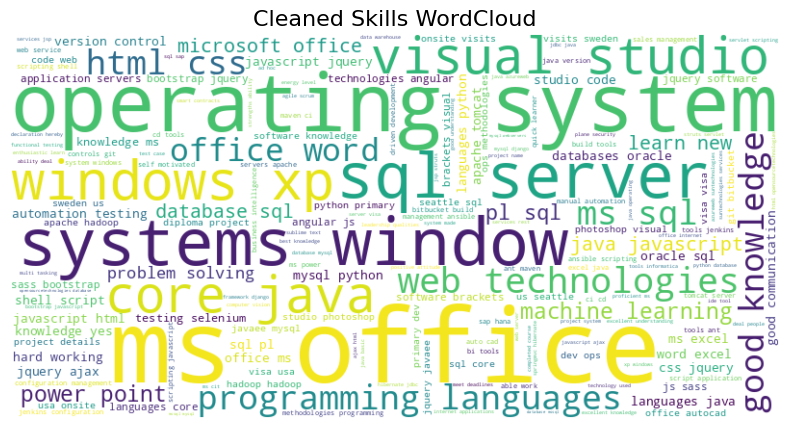

In [102]:
def plot_wordcloud(text_series, title):
    combined_text = ' '.join(text_series.dropna()).lower()
    tokens = re.split(r'[,\s\n]+', combined_text)
    tokens = [word.strip() for word in tokens if word.isalpha() and word not in non_skills and len(word) > 1]
    
    filtered_text = ' '.join(tokens)

    if len(filtered_text.strip()) == 0:
        print(f"No data available to generate word cloud for {title}.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()
    
plot_wordcloud(df['Skills'], "Cleaned Skills WordCloud")


Operating systems, visual studio, window and progrmming lanugage appears a lot of resume from the word Cloud in all the resume.

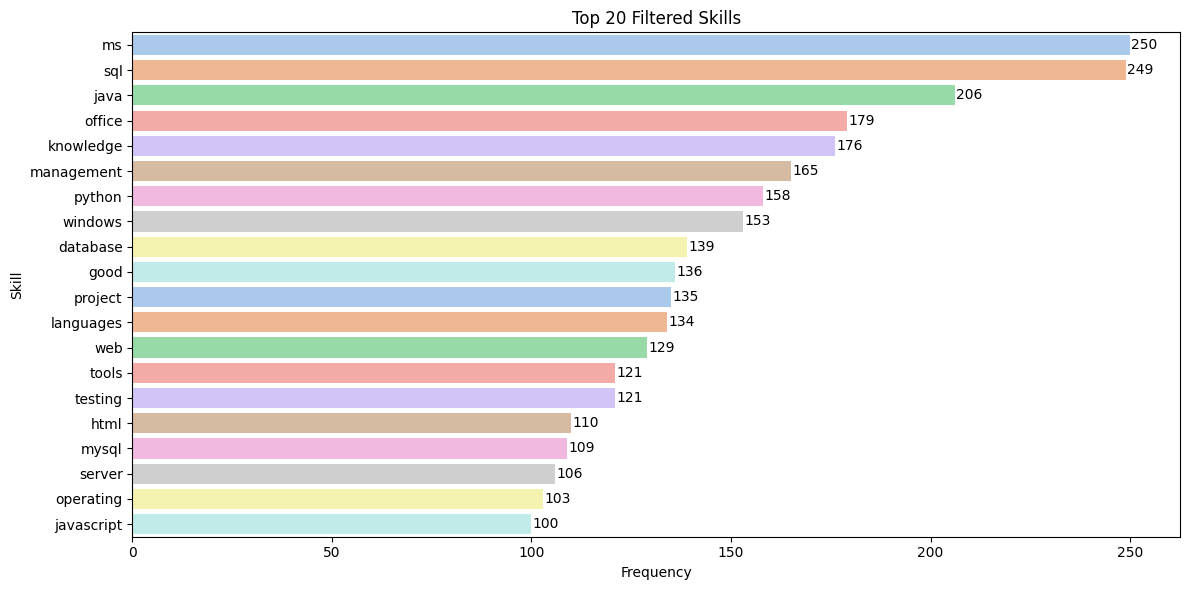

In [103]:

# Combine and clean text
combined_text = ' '.join(df['Skills'].dropna()).lower()
# Tokenize and filter
tokens = re.split(r'[,\s\n]+', combined_text)
filtered_tokens = [word.strip() for word in tokens if word.isalpha() and word not in non_skills and len(word) > 1]

# Count frequencies
skill_counts = Counter(filtered_tokens)
# Display top skills
top_skills = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Frequency'])


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_skills, x='Frequency', y='Skill', palette='pastel')
plt.title('Top 20 Filtered Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')

for i, v in enumerate(top_skills['Frequency']):
    ax.text(v + 0.3, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


ms, sql,jave, office and management appears the most in the resume data as shown in the graph above.

## 3.6 Sample Extraction Visulisation from Resume

In [104]:
# Print original resume text for Resume 7
print("Original Resume (Resume 7):\n", df['Cleaned_Resume'][6])


# Print extracted parts for Resume 7
print("=" * 80)
print("\nExtracted Skills:\n", df['Skills'][6])
print("\nExtracted Education:\n", df['Education'][6])
print("\nExtracted Experience:\n", df['Experience'][6])


Original Resume (Resume 5):
 skills python tableau data visualization r studio machine learning statistics iabac certified data scientist with versatile experience over 1+ years in managing business, data science consulting and leading innovation projects, bringing business ideas to working real world solutions. being a strong advocator of augmented era, where human capabilities are enhanced by machines, fahed is passionate about bringing business concepts in area of machine learning, ai, robotics etc., to real life solutions.education details january 2017 b. tech computer science & engineering mohali, punjab indo global college of engineering data science consultant data science consultant - datamites skill details machine learning- exprience - 13 months python- exprience - 24 months solutions- exprience - 24 months data science- exprience - 24 months data visualization- exprience - 24 months tableau- exprience - 24 monthscompany details company - datamites description - analyzed and 

In summary, regex-based pattern matching effectively extracts skills, education, and experience from resumes, but often introduces significant noise, requiring further refinement and investigation.

# 4. Syntactic Analysis Using spaCy(POS Tagging): Noun Phrases and Named Entities

In [105]:
# Load English model using SpaCy
nlp = spacy.load('en_core_web_sm')

#Take the the second resume as example:
text = df['Cleaned_Resume'][1]
doc = nlp(text)

# Extract nouns and proper nouns from second resume
important_nouns = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN']]
print("Nouns and Proper Nouns:\n\n", important_nouns)

print("\n")
# Extract noun phrases
noun_phrases = [chunk.text for chunk in doc.noun_chunks]
print("Noun Phrases:\n\n", noun_phrases)


Nouns and Proper Nouns:

 ['education', 'details', 'may', 'b.e', 'uit', 'data', 'scientist', 'data', 'scientist', 'matelabs', 'skill', 'details', 'python-', 'exprience', 'year', 'months', 'exprience', 'months', 'exprience', 'year', 'months', 'machine', 'exprience', 'year', 'months', 'sklearn-', 'exprience', 'year', 'months', 'scipy-', 'exprience', 'year', 'months', 'exprience', 'year', 'monthscompany', 'details', 'company', 'matelabs', 'description', 'platform', 'business', 'professionals', 'dummies', 'enthusiasts', 'koramangala', 'block', 'achievements', 'tasks', 'sukh', 'sagar', 'bengaluru', 'india', 'auto', 'preprocessing', 'steps', 'machine', 'value', 'treatment', 'detection', 'encoding', 'scaling', 'feature', 'selection', 'dimensionality', 'reduction', 'classification', 'regression', 'model', 'linkedin.com/in/aditya-rathore-', 'b4600b146', 'reasearch', 'time', 'series', 'forecasting', 'model', 'arima', 'sarimax', 'holt', 'winter', 'prophet', 'feature', 'problem', 'github.com/ratho

In [106]:
#Take the the second resume as example:
text = df['Cleaned_Resume'][1]
doc = nlp(text)


In [107]:
# Extract nouns and proper nouns from second resume
important_nouns = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN']]
print("Nouns and Proper Nouns:\n\n", important_nouns)

print("\n")
# Extract noun chunks (noun phrases)
noun_phrases = [chunk.text for chunk in doc.noun_chunks]
print("Noun Phrases:\n\n", noun_phrases)


Nouns and Proper Nouns:

 ['education', 'details', 'may', 'b.e', 'uit', 'data', 'scientist', 'data', 'scientist', 'matelabs', 'skill', 'details', 'python-', 'exprience', 'year', 'months', 'exprience', 'months', 'exprience', 'year', 'months', 'machine', 'exprience', 'year', 'months', 'sklearn-', 'exprience', 'year', 'months', 'scipy-', 'exprience', 'year', 'months', 'exprience', 'year', 'monthscompany', 'details', 'company', 'matelabs', 'description', 'platform', 'business', 'professionals', 'dummies', 'enthusiasts', 'koramangala', 'block', 'achievements', 'tasks', 'sukh', 'sagar', 'bengaluru', 'india', 'auto', 'preprocessing', 'steps', 'machine', 'value', 'treatment', 'detection', 'encoding', 'scaling', 'feature', 'selection', 'dimensionality', 'reduction', 'classification', 'regression', 'model', 'linkedin.com/in/aditya-rathore-', 'b4600b146', 'reasearch', 'time', 'series', 'forecasting', 'model', 'arima', 'sarimax', 'holt', 'winter', 'prophet', 'feature', 'problem', 'github.com/ratho

## 4.1 WordCloud of Nouns from Sample Resume

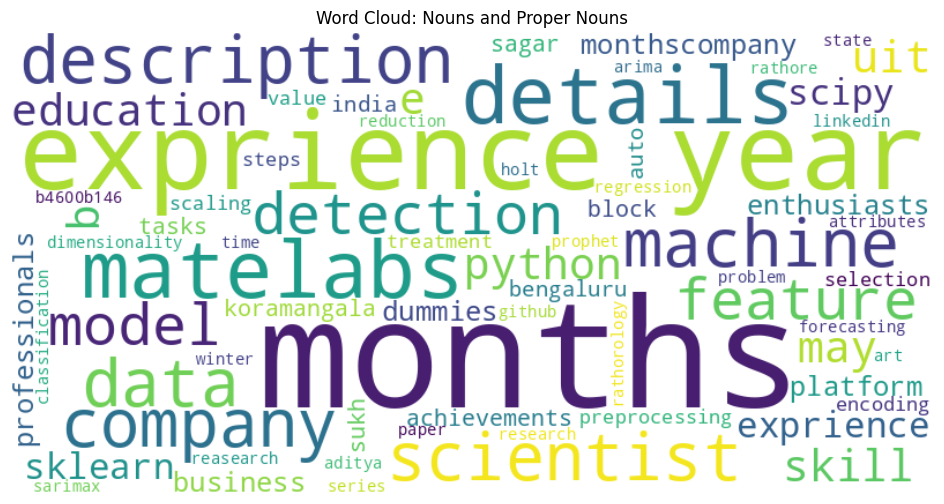

In [108]:
# Join nouns into one text string
text_nouns = ' '.join(important_nouns)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_nouns)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Nouns and Proper Nouns')
plt.show()


## 4.2 Most Frequent Noun Phrases Across Resumes

In [109]:
# Add more domain-specific noisy phrases
custom_stop_phrases = {
    'the team', 'a team', 'this project',
    'the application', 'the users', '24 months', 'the client', 'project name',
    'the business requirements', 'the customer', 'the process', 'c exprience',
    'my sql team size', 'software developer synopsis', 'the performance'
}

def clean_phrase(phrase):
    phrase = phrase.lower().strip()
    # Remove punctuation
    phrase = phrase.translate(str.maketrans('', '', string.punctuation))
    
    # Keep only alphabetic words longer than 1 character
    words = [w for w in phrase.split() if w.isalpha() and len(w) > 1]

    # Phrase should have at least 2 alphabetic words
    if len(words) < 2:
        return None

    cleaned_phrase = ' '.join(words)

    # Remove if phrase is in custom stop words or all words are stopwords
    if cleaned_phrase in custom_stop_phrases:
        return None
    if all(word in stop_words for word in words):
        return None

    return cleaned_phrase

# Apply filtering and cleaning on noun chunks
df['Noun_Phrases'] = df['Cleaned_Resume'].apply(
    lambda text: list(filter(None, [clean_phrase(chunk.text) for chunk in nlp(text).noun_chunks]))
)

# Flatten the list of phrases and count frequency
all_phrases = [phrase for sublist in df['Noun_Phrases'] for phrase in sublist]
phrase_counts = Counter(all_phrases)

# Print top 20 meaningful noun phrases
print("Top 20 Refined Noun Phrases:")
for phrase, count in phrase_counts.most_common(20):
    print(f"{phrase}: {count}")

Top 20 Refined Noun Phrases:
the project: 420
education details: 309
the data: 253
the company: 240
exprience less than year months: 231
exprience months: 206
test cases: 98
java developer: 88
shell scripting: 87
less than year months: 81
team members: 80
sql server: 77
machine learning: 76
the target: 70
operating systems: 69
good knowledge: 68
less than year: 64
this application: 64
the team members: 64
visual studio: 62


# 5. Named Entity Recognition Visualization (using spaCy)

In [110]:
nlp = spacy.load('en_core_web_sm')

text = df['Cleaned_Resume'][22] 
# Process the text with spaCy to get entities
doc = nlp(text)

displacy.render(doc, style='ent', jupyter=True)


Using NER from Spacy library on the resume dataset helps to clearify identify and highlight important information such as names, dates and organisation and location.. While it improves readability and speeds up information retrieval, some irrelevant or repetitive phrases may still require further cleaning for more accurate analysis.